#### Import libraries 

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

##### Load Data set

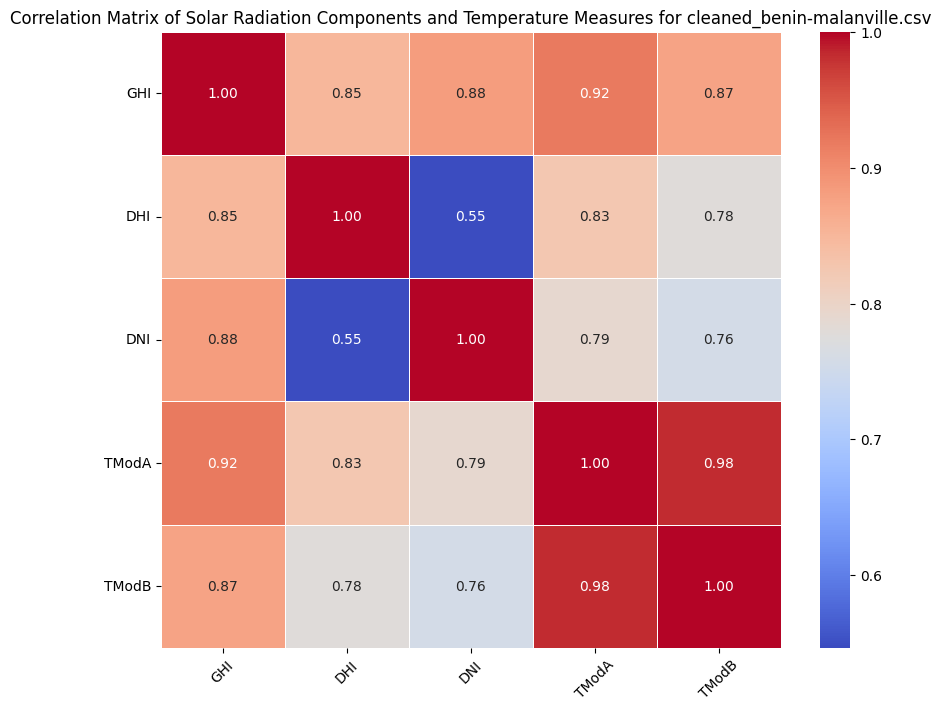

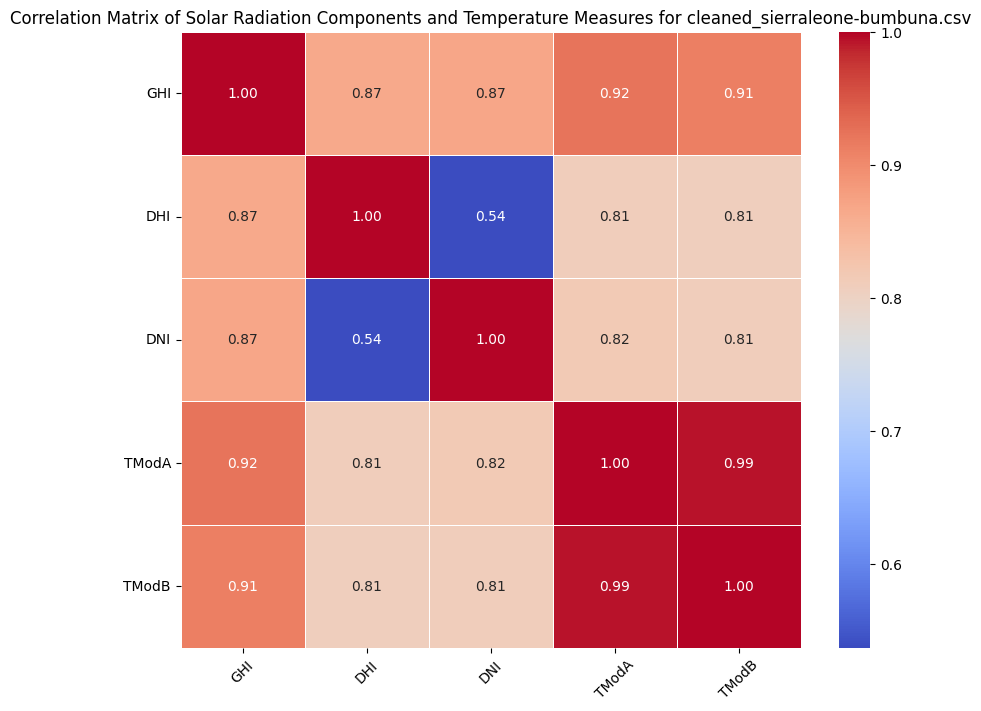

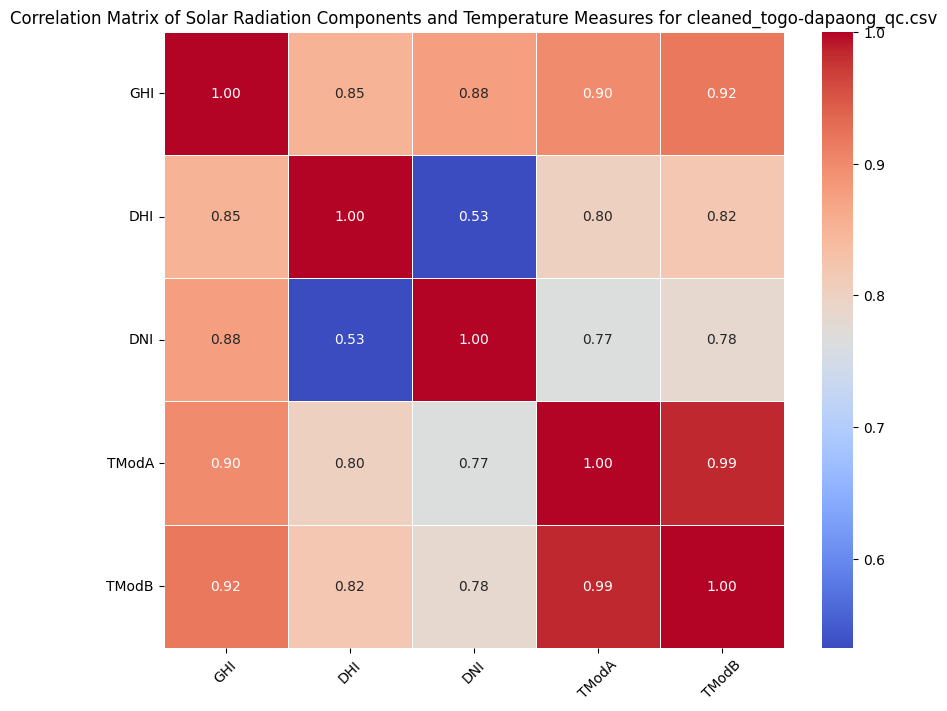

In [10]:
class DataFolderProcessor:
    def __init__(self, folder_name='cleaned_data'):
        self.current_directory = os.getcwd()
        self.data_folder_path = os.path.join(self.current_directory, folder_name)
        self.csv_files = [f for f in os.listdir(self.data_folder_path) if f.endswith('.csv')]

    def process_file(self, csv_file):
        file_path = os.path.join(self.data_folder_path, csv_file)
        df = pd.read_csv(file_path)
        return df

# Example usage
processor = DataFolderProcessor()
csv_files = processor.csv_files
for csv_file in csv_files:
    df = processor.process_file(csv_file)  

    # Columns of interest
    columns_of_interest = ['GHI', 'DHI', 'DNI', 'TModA', 'TModB']
    df_subset = df[columns_of_interest]

   # Calculate the correlation matrix
    correlation_matrix = df_subset.corr()

   # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Matrix of Solar Radiation Components and Temperature Measures for {csv_file}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

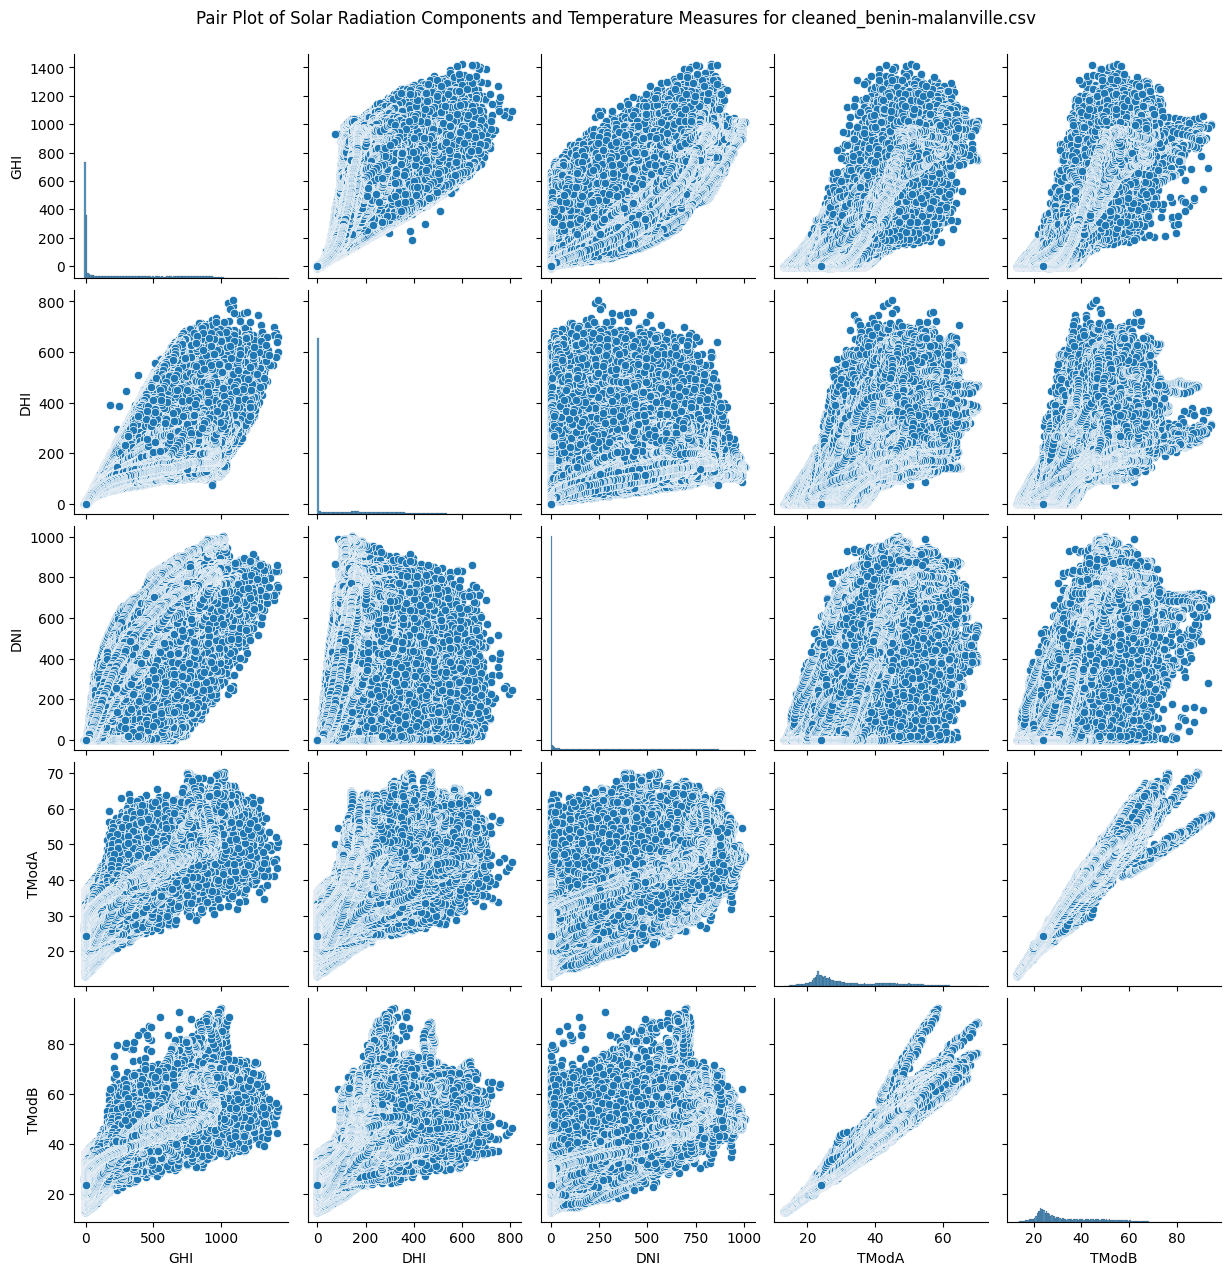

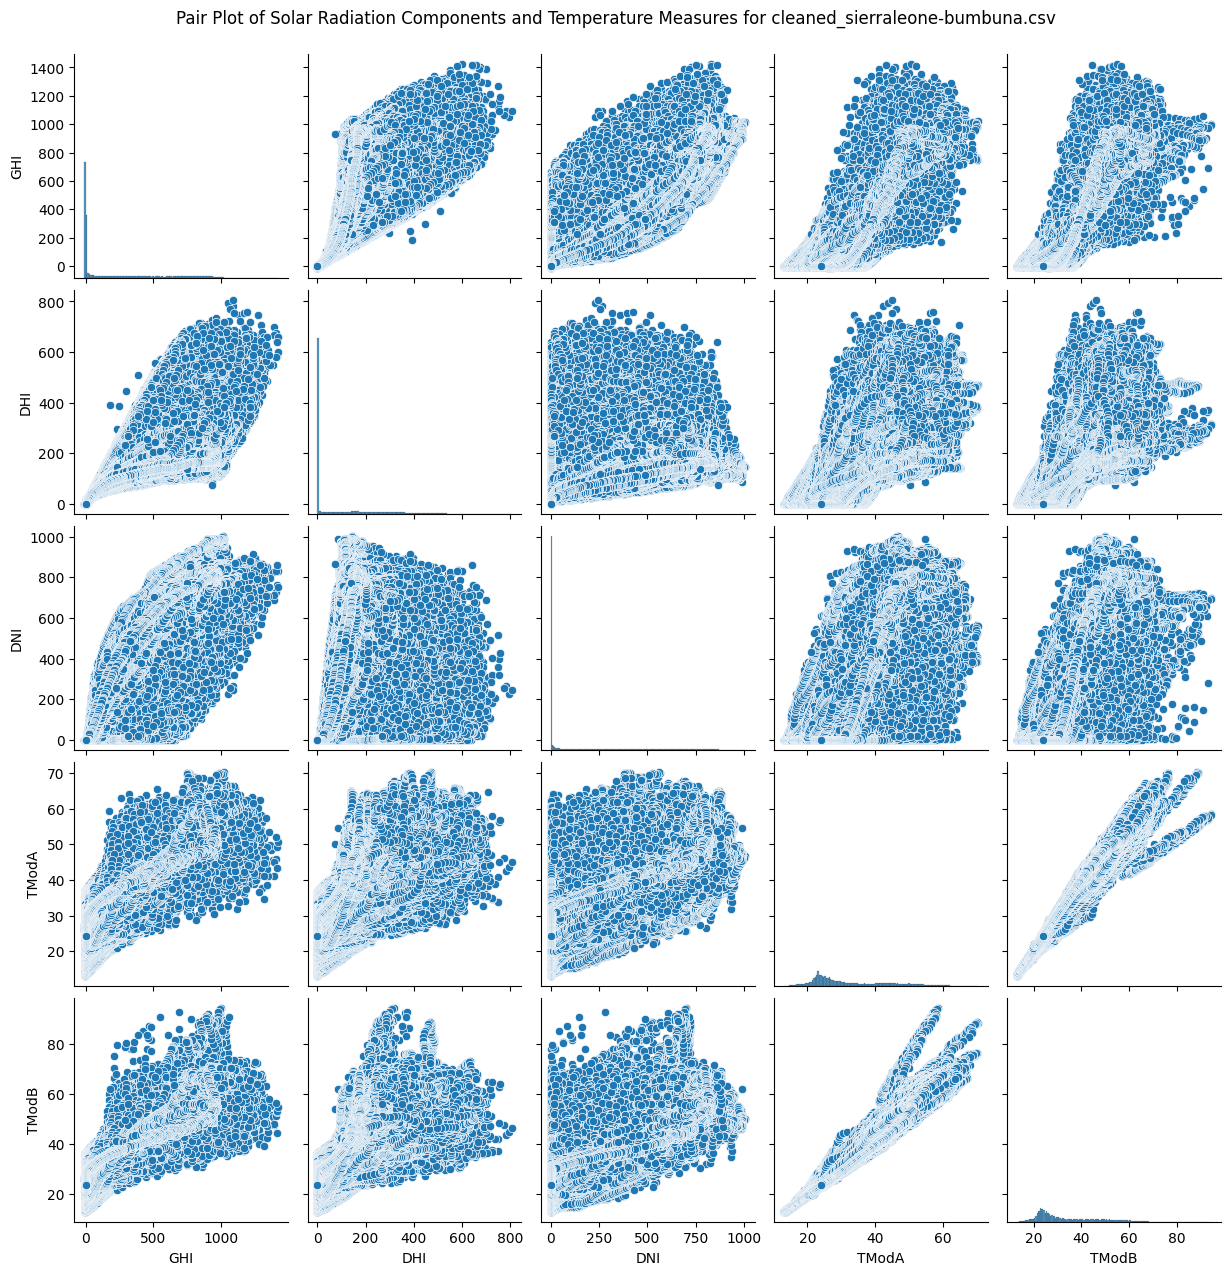

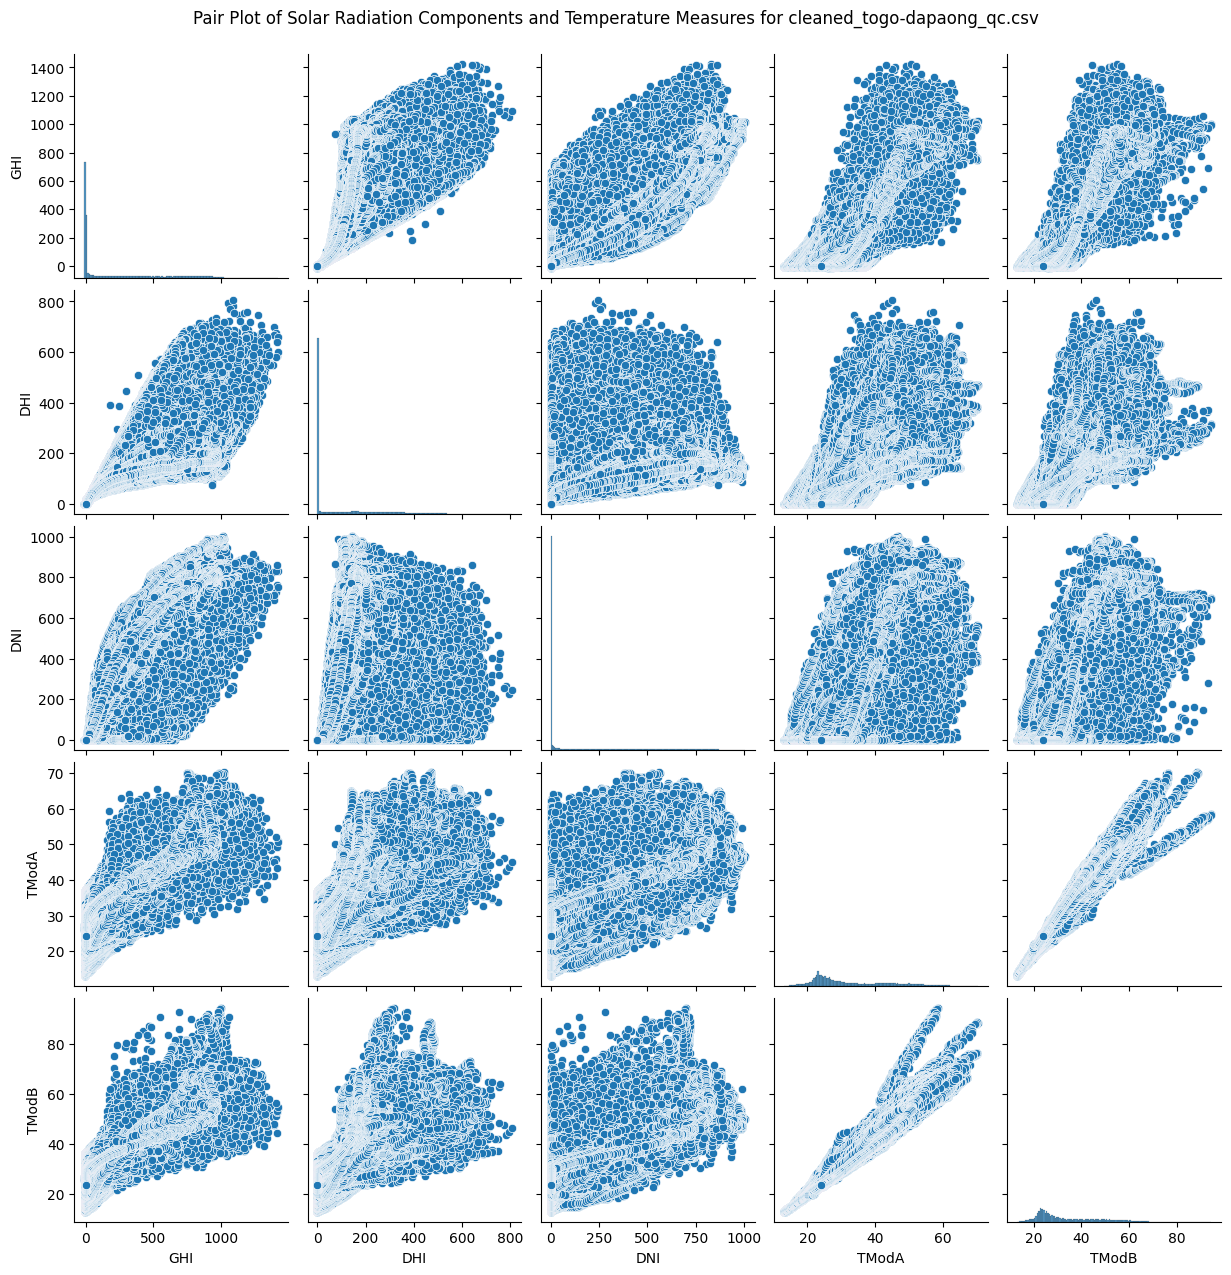

In [11]:
for csv_file in csv_files:
    df = processor.process_file(csv_file)  
    # Pair plot
    sns.pairplot(df_subset)
    plt.suptitle(f'Pair Plot of Solar Radiation Components and Temperature Measures for {csv_file}', y=1.02)
    plt.show()

#### Scatter Matrix for Wind Conditions and Solar Irradiance

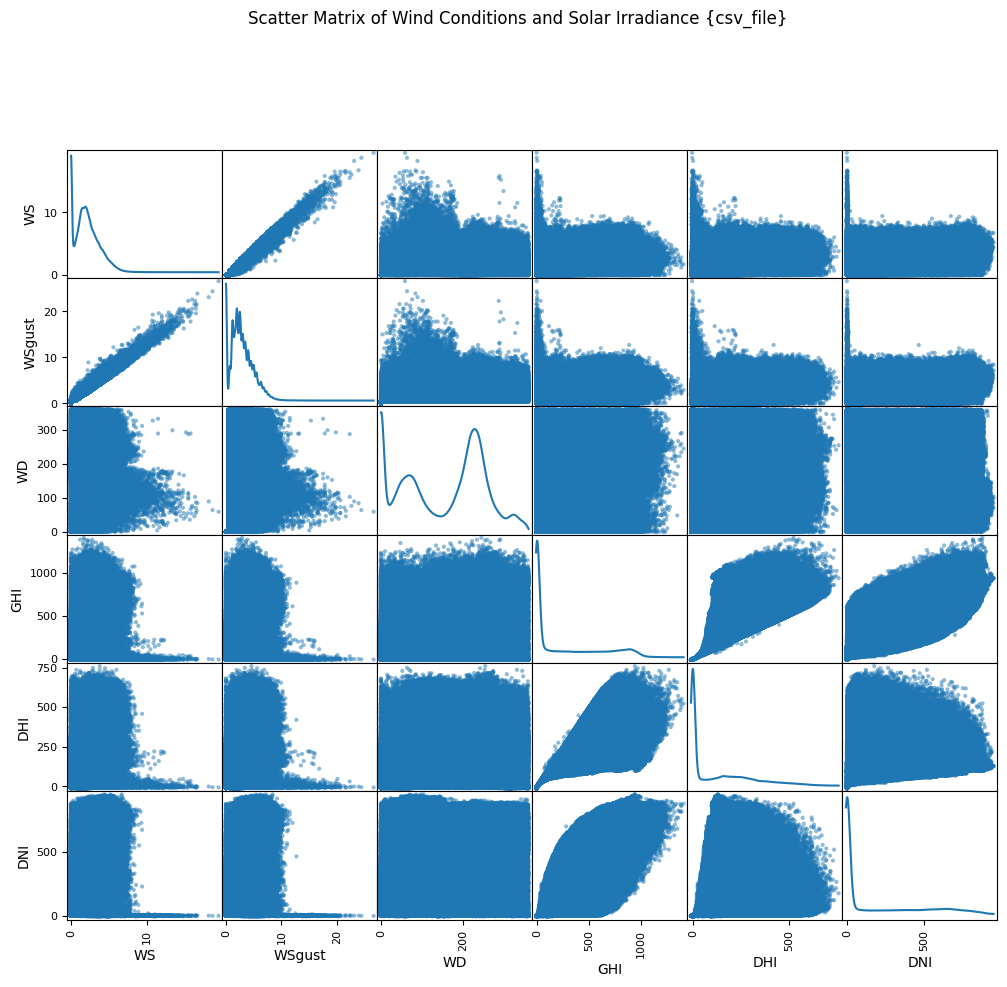

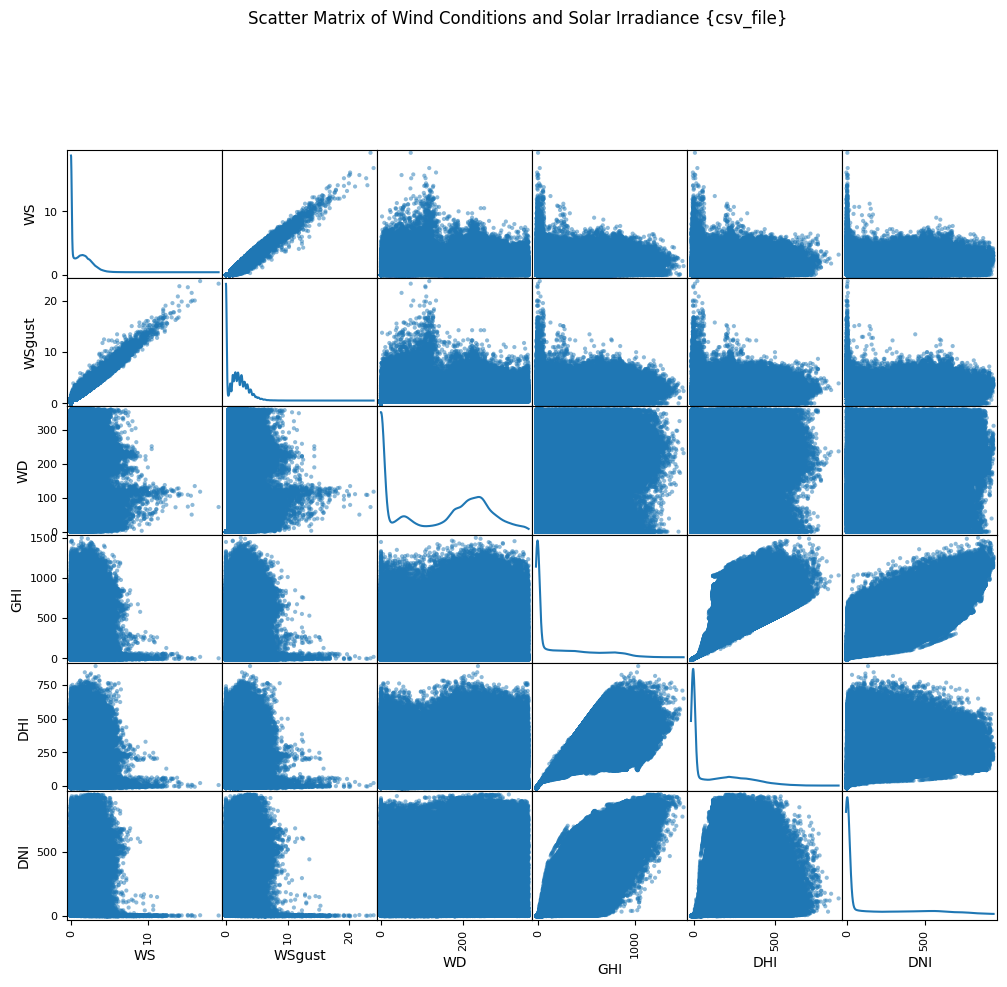

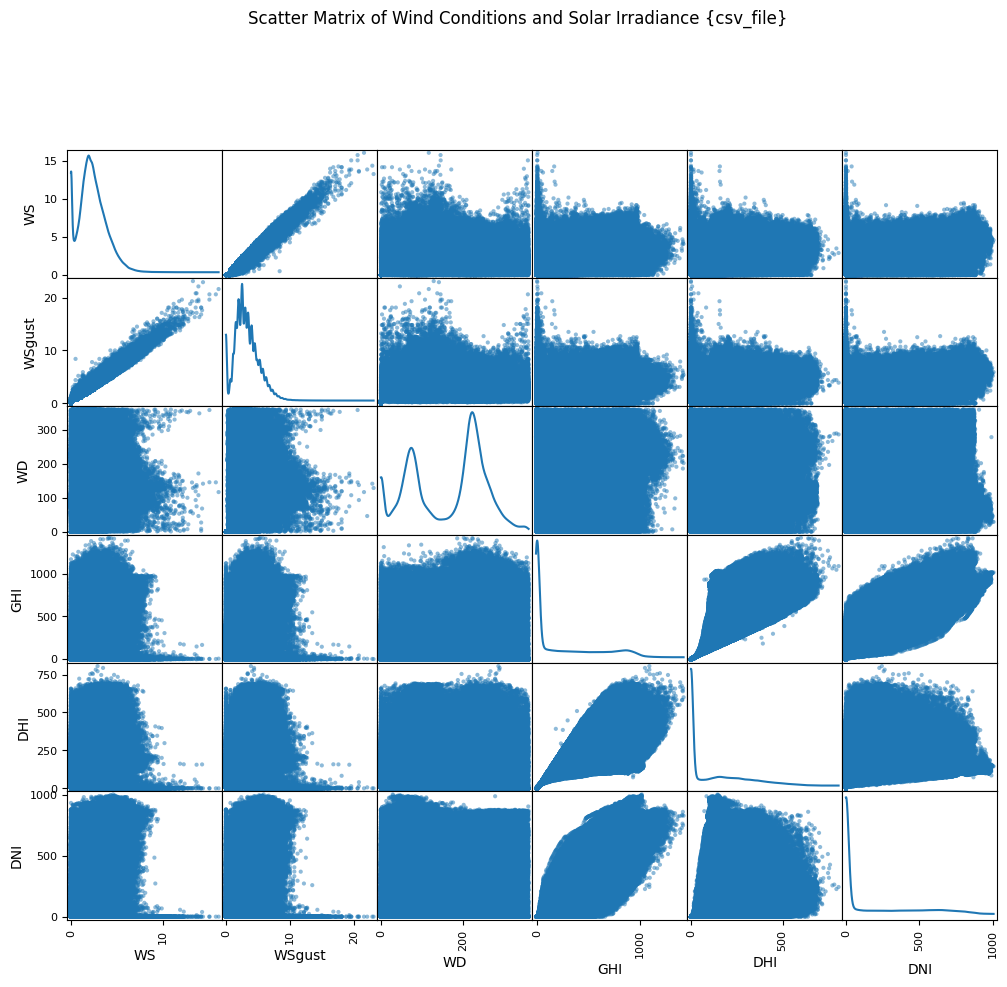

In [13]:
for csv_file in csv_files:
    df = processor.process_file(csv_file)
    # Columns of interest for wind conditions and solar irradiance
    wind_columns = ['WS', 'WSgust', 'WD', 'GHI', 'DHI', 'DNI']
    wind_dataset_subset = df[wind_columns]

    # Scatter matrix
    pd.plotting.scatter_matrix(wind_dataset_subset, figsize=(12, 10), diagonal='kde')
    plt.suptitle(f'Scatter Matrix of Wind Conditions and Solar Irradiance {csv_file}', y=1.02)
    plt.show()

###### Correlation Analysis Class

In [ ]:
import pandas as pd
from correlation_analysis import CorrelationAnalysis

# Load your dataset
for csv_file in csv_files:
    df = processor.process_file(csv_file)
    

# Example usage
    correlation_analysis = CorrelationAnalysis(df)
    correlation = correlation_analysis.analyze('GHI', 'DHI')
    print(f'Correlation between GHI and DHI: {correlation}')
